<a href="https://colab.research.google.com/github/BbangB/Code/blob/main/CNN_CIFAR_10_Categorical_Classification_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 - Categorical Classification

In [2]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [1]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


* Train_Data Information

In [3]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [4]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

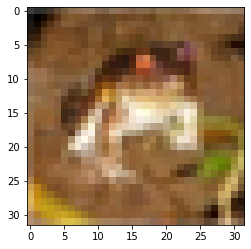

In [5]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit)
plt.show()

In [6]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[0][0])


[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

((50000, 3072), (10000, 3072))

* Normalization

In [7]:
X_train = X_train.astype(float) / 309
X_test = X_test.astype(float)/309

In [8]:
print(X_train[0])

[[[0.19093851 0.20064725 0.2038835 ]
  [0.13915858 0.14886731 0.14563107]
  [0.1618123  0.15533981 0.13915858]
  ...
  [0.51132686 0.42718447 0.34951456]
  [0.49190939 0.40453074 0.33009709]
  [0.4789644  0.4012945  0.33333333]]

 [[0.05177994 0.06472492 0.06472492]
  [0.         0.         0.        ]
  [0.05825243 0.02588997 0.        ]
  ...
  [0.39805825 0.28478964 0.17799353]
  [0.38511327 0.26860841 0.1618123 ]
  [0.39482201 0.2815534  0.18446602]]

 [[0.08090615 0.0776699  0.06796117]
  [0.05177994 0.02265372 0.        ]
  [0.15857605 0.08737864 0.02588997]
  ...
  [0.38187702 0.27184466 0.1618123 ]
  [0.38834951 0.27184466 0.1618123 ]
  [0.35275081 0.23624595 0.13592233]]

 ...

 [[0.67313916 0.55016181 0.31067961]
  [0.65048544 0.49514563 0.11003236]
  [0.6407767  0.5210356  0.08414239]
  ...
  [0.51779935 0.43042071 0.22653722]
  [0.18122977 0.10032362 0.02265372]
  [0.17152104 0.11003236 0.06472492]]

 [[0.58252427 0.44983819 0.31067961]
  [0.55987055 0.39805825 0.13592233]


> ## 2) One Hot Encoding

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [10]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 3968개의 Nodes

In [41]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(filters= 32, kernel_size=(3,3), activation= 'relu', input_shape = (32,32,3)))
model.add(Dropout(0.25))
model.add(layers.MaxPool2D(pool_size= (2,2)))
model.add(layers.Conv2D(filters= 32, kernel_size=(3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(layers.MaxPool2D(pool_size= (2,2)))
model.add(layers.Conv2D(filters= 32, kernel_size=(3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation= 'softmax'))

* 모델 구조 확인

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)         

> ## 2) Model Compile

* 모델 학습방법 설정

In [43]:
model.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [44]:
%%time

T_model = model.fit(X_train, y_train,
                     epochs=100,
                     batch_size = 128,
                     validation_split = 0.2)


Epoch 1/100
313/313 [==============================] - 5s 15ms/step - loss: 1.6399 - accuracy: 0.4117 - val_loss: 3.3372 - val_accuracy: 0.1336
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 1.2560 - accuracy: 0.5543 - val_loss: 2.5650 - val_accuracy: 0.2339
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 1.1167 - accuracy: 0.6030 - val_loss: 2.2338 - val_accuracy: 0.3415
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 1.0246 - accuracy: 0.6374 - val_loss: 1.6087 - val_accuracy: 0.4510
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.9612 - accuracy: 0.6596 - val_loss: 1.3555 - val_accuracy: 0.5328
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.9032 - accuracy: 0.6804 - val_loss: 1.2861 - val_accuracy: 0.5535
Epoch 7/100
313/313 [==============================] - 5s 14ms/step - loss: 0.8629 - accuracy: 0.6957 - val_loss: 1.2099 - val_accuracy:

> ## 4) 학습 결과 시각화

* Loss Visualization

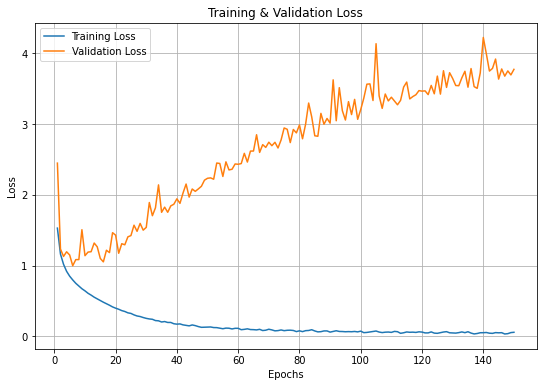

In [37]:
import matplotlib.pyplot as plt

epochs = range(1, len(T_model.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, T_model.history['loss'])
plt.plot(epochs, T_model.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [38]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 3.8290 - accuracy: 0.6446
Loss = 3.82904
Accuracy = 0.64460


> ## 6) Model Predict

* Probability

In [39]:
np.set_printoptions(suppress = True, precision = 9)

print(model.predict(X_test[:1,:]))

[[0.          0.          0.          1.          0.          0.          0.          0.          0.000000013 0.         ]]


* Class

In [40]:
print(np.argmax(model.predict(X_test[:1,:]), axis = 1))

[3]


# 
# 
# 
# The End
# 
# 
# 